# Introducing the Julia MaxPlus.jl Package as (max,+) Toolbox

## Algebra (max,+)


The algebra (max,+) (pronounced max-plus) redefines the addition and multiplication operators of classical algebra by respectively the maximum operators noted $\oplus$ and addition noted $\otimes$ in the domain of real numbers $\mathbb{R}$ increased by the number minus infinity ($\varepsilon = -\infty$) which we call $\mathbb{R}_{\varepsilon} = \mathbb{R} \cup \{ -\infty \}$.  Its algebraic structure is that of a selective-invertible dioid according to the Gondran-Minoux classification (this structure is more frequently called idempotent semi-field) $(\mathbb{R}_{\varepsilon}, \oplus, \otimes)$.

$$\forall a,b \in \mathbb{R}_{\varepsilon}: a \oplus b \triangleq \max(a,b)$$
$$\forall a,b \in \mathbb{R}_{\varepsilon}: a \otimes b \triangleq a + b$$

The interest of matrix calculation in this algebra is taught as early as the 1960s by J. Kuntzman in his network theory. It is used in many fields Operational research (network theory), Physics (Quantification), Probability (Cramer transform), Automation (discrete event systems), Computer science (automata theory, Petri nets), Mathematics (algebraic geometry ).

In a previous tutorial, we showed you how to install our Max-Plus toolbox for the Julia language, the main purpose of which is to facilitate matrix calculations in this algebra. This document presents only the basic functions of the toolbox while introducing the basics of algebra (max,+). The algebra (min,+) will be the subject of another tutorial.

For those who wish to compare this toolbox with Sicoslab, we remind you that a Max-Plus Sicoslab number is created by the maxplus function abbreviated by the function `#()`, that the neutral elements are noted `%0` and `%1`, that a Max-Plus number is absorbing and that finally a help and a demonstration are accessible from the menus of ScicosLab. One can consult the [bibliography](../docs/src/bibliography.md) to obtain the demonstration of certain results and the description of the algorithms used. For example, the [following PDF document](https://jpquadrat.github.io/TPALGLIN.pdf) describes the Max-Plus features of ScicosLab in a similar way to this tutorial.

In this document term (Scilab) toolbox is equivalent to (Julia) package.

## Start the Max-Plus Toolbox for Julia

From Julia's REPL, launch Jupyter notebook:

In [1]:
# using IJulia
# notebook()

In a newly created Jupyter document, load the Max-Plus toolbox from the MaxPlus.jl folder:

In [2]:
push!(LOAD_PATH, pwd())
using MaxPlus

For the moment, for educational purposes, we activate a special display mode for Max-Plus numbers that explicitly displays the $-\infty$ and the $0.0$. More pleasant display modes will be explained later.

In [3]:
set_tropical_display(0)

I will show -Inf and 0.0

This toolbox allows to generate code $\LaTeX$ via the `Base.show`. In Jupyter, this mode seems to be the one used by default, but here, we prefer to keep the display in plain text. To do this, you must first type:

In [4]:
Base.show(io::IO, ::MIME"text/latex", x::MP) = show(io, MIME"text/plain", x)
Base.show(io::IO, ::MIME"text/latex", A::MPAbstractVecOrMat) = show(io, MIME"text/plain", A)

## Max-Plus Scalars

Before presenting the algebra (max,+), let's type a few purely Julia lines to learn how to create Max-Plus scalars thanks to the constructor `MP()`:

In [5]:
a = MP(1.0);  b = MP(3.5);  c = MP(5)

(max,+) 5.0

In Scilab we would have written `#(1.0)`. In this toolbox, the Max-Plus numbers are internally encoded by des `Float64` (via the accessible field `λ`) because the numbers in this algebra are defined in the space $\mathbb{R}_{\varepsilon}$. For more flexibility, the constructor accepts integers (`Integer`) but they will be converted internally to `Float64` (Note that there are other Julia packages on numbers on Max-Plus which offer to change the internal type to integer but this is not the case with this toolkit).

To go back to classical algebra (namely `(+,*)`) there are different ways to achieve this. The first way consists in accessing the field `λ` of objects Julia (scalar) either via the function `plustimes` does it too (its name comes from Scilab in reference to the `+`, `*` operators of classical algebra) or methods with names more in the spirit of Julia are also possible `Float64` and `float`. These functions also accept sparse and full matrices as well as sparse and full vectors.

In [6]:
a,   a.λ,   typeof(a),   typeof(a.λ),   plustimes(a),   Float64(a),   float(a)

(1.0, 1.0, MP, Float64, 1.0, 1.0, 1.0)

In [7]:
typeof(a), typeof(a.λ), typeof(plustimes(a)), typeof(Float64(a)), typeof(float(a))

(MP, Float64, Float64, Float64, Float64)

Max-Plus numbers contaminate other numbers (integers, reals): they convert a non-Max-Plus number into a Max-Plus number via arithmetic operators or implicit promotion operators. We effect, on the one hand we consider that we work only in this algebra and on the other hand that simplifies the writing of the code (as well as its reading):

In [8]:
d = 1.0
typeof(d),   typeof(c),   typeof(c + d),   typeof((c + d).λ),   c + d

(Float64, MP, MP, Float64, 5.0)

We see that the Max-Plus addition has converted `d` from type `Float64` to type `MP`. Same behavior for integers where `f` from type `Int64` is converted to to type `MP`:

In [9]:
f = 1
typeof(f), typeof(c), typeof(c + f), typeof((c + f).λ),   c + f

(Int64, MP, MP, Float64, 5.0)

## Max-Plus constants

The neutral elements for $\oplus$ and $\otimes$ operators are given as Julia constants:
- Neutral element $\varepsilon$ (sometimes denoted $\mathbb{0}$ in certain documents and on Scilab `%0`) for the operator $\oplus$: the Julia constants are `mp0` either `ε` (obtained by typing `\varepsilon`) equal $-\infty$ (either `MP(-Inf)`). This element is absorbing for the multiplication $\varepsilon\otimes a=a\otimes \varepsilon=\varepsilon$.

- Neutral element $e$ (sometimes denoted $\mathbb{1}$ in certain documents and on Scilab `%1`) for operator $\otimes$: the Julia constants are `mp1` either equal `mpe` to `0`.

- Although this toolbox is dedicated to Max-Plus algebra, it uses the constant `mptop` equal $+\infty$ when doing calculations in Min-Plus dual algebra. This constant corresponds to the ScicosLab `%top`.

These numbers are of type `MP` (and we can eventually convert them into numbers of classical algebra either via the field `λ` or the function `plustimes`.

In [10]:
mp0, ε, MP(-Inf), mp1, mpe, MP(0), mptop, zero(MP), one(MP), mptop, MP(Inf)

(-Inf, -Inf, -Inf, 0.0, 0.0, 0.0, Inf, -Inf, 0.0, Inf, Inf)

## Controlling the display of Max-Plus numbers

We see that so far Julia is showing in her results `-Inf` and `0.0` for `ε` and `0` what is not very compact. In Max-Plus we often handle large matrices and a good display is important. This is because at the beginning of the document we wrote `set_tropical_display(0)` to force this display `mode 0` in a pedagogical concern so that the reader does not confuse the Max-Plus zeros with the zeros of classical algebra, but there are four possible styles of display of Max-Plus numbers that can be switched with the function `set_tropical_display` that accepts a number between 0 and 4. The `mode 1` being the one defined by default and follows the display in ScicosLab because it allows to display the matrices in a compact way. Indeed, it is common in Max-Plus to have to manipulate and display large matrices filled with elements $\varepsilon$.

- Style 0: is the classic Julia display: numbers $-\infty$ are displayed `-Inf` and numbers as reals like `0.0`.
- Style 1 or 2: numbers $-\infty$ are displayed as a dot `.`.
- Style 3 or 4: numbers $-\infty$ are displayed as `ε`.
- Style 1 or 3: real numbers which can be written as integers (therefore without decimal places) will be displayed as integers. For example `0`.
- Style 2 or 4: Zeros are displayed as `e`.

The activated style impacts the functions `Base.show` and also impacts the function`LaTeX` for the generation of $\LaTeX$ code for the matrices (which we will see a little later in this document).

In [11]:
# Classic Julia-style display 
set_tropical_display(0)

J = MP([-Inf 0; 0 -Inf])

I will show -Inf and 0.0

2×2 (max,+) dense matrix:
  -Inf    0.0
   0.0   -Inf


In [12]:
# Display 0s as e
set_tropical_display(2)

J

I will show (max,+) -Inf and (min,+) +Inf as . and 0.0 as e

2×2 (max,+) dense matrix:
  .   e
  e   .


In [13]:
#Display -Inf as ε
set_tropical_display(3)

J

I will show (max,+) -Inf and (min,+) +Inf as ε

2×2 (max,+) dense matrix:
  ε   0
  0   ε


In [14]:
#  Display -Inf as ε and 0 as e
set_tropical_display(4)

J

I will show (max,+) -Inf and (min,+) +Inf as ε and 0.0 as e

2×2 (max,+) dense matrix:
  ε   e
  e   ε


And finaly, the default mode:

In [15]:
# Display -Inf as a .
set_tropical_display(1)

J

I will show (max,+) -Inf and (min,+) +Inf as .

2×2 (max,+) dense matrix:
  .   0
  0   .


## Max-Plus Operator $\oplus$

The addition operator is redefined by the `max` classical algebra operator. Its symbol, to differentiate it from addition in classical algebra, is $\oplus$. But in Julia we will keep the symbol `+`. This operator is associative, commutative, has a neutral element (denoted $\varepsilon$) and is idempotent. $\forall a,b,c \in \mathbb{R}_{\varepsilon}:$

$$a \oplus b \triangleq \max(a,b)$$

In [16]:
a = MP(1); b = MP(3); c = MP(5);
(a, b, c)

(1, 3, 5)

In [17]:
a + b   # ≜ max(a, b) = max(1, 3) = 3

(max,+) 3

####  $\oplus$ is not invertible or simplifiable

The following equality $a \oplus b = a \oplus c$ does not result $b = c$. On the other hand, we will have $a \oplus b = a$ if $a \geq b$ or more generally $a \oplus b = a$ or $b$. According to the terminology of Gondran-Minoux $\oplus$ is selective.

#### Commutativity of $\oplus$

$$a \oplus b = b \oplus a$$
$$\triangleq$$
$$\max(a,b) = \max(b,a)$$

In [18]:
a + b == b + a

true

#### Associativity of $\oplus$

$$a \oplus b \oplus c = (a \oplus b) \oplus c = a \oplus (b \oplus c)$$

In [19]:
a + b + c == (a + b) + c == a + (b + c)

true

In [20]:
a + b + c # ≜ max(a, b, c) == max(1, 3, 5)

(max,+) 5

#### Neutral element $\varepsilon$ for $\oplus$

$$a \oplus \varepsilon = \varepsilon \oplus a = a$$
$$\triangleq$$
$$\max(a,-\infty) = \max(-\infty,a) = a$$

In [21]:
a + ε == ε + a == a

true

Equivalent to:

In [22]:
a + mp0 == mp0 + a == a

true

In [23]:
(a, mp0, ε), (a + mp0, a + ε), (mp0 + a, ε + a)

((1, ., .), (1, 1), (1, 1))

Note that `0` is neutral for positive numbers:

In [24]:
a + 0 == 0 + a == a

true

In [25]:
a, 0, a + 0

(1, 0, 1)

#### $\oplus$ is idempotent

In [26]:
a + a    # ≜ max(a, a) == max(1, 1) == 1

(max,+) 1

## Max-Plus Operator $\otimes$

The multiplication operator is redefined by the addition operator which is associative, commutative, has the neutral element $e$, the absorbing element $\varepsilon$ and is distributive over $\oplus$.

In [27]:
a * b    # ≜ a + b == 1 + 3 == 4

(max,+) 4

#### Commutativity of $\otimes$

$$a \otimes b = b \otimes a$$
$$\triangleq$$
$$a + b = b + a$$

In [28]:
a * b == b * a

true

#### Associativity of $\otimes$

$$a \otimes b \otimes c = (a \otimes b) \otimes c = a \otimes (b \otimes c)$$

In [29]:
a * b * c == (a * b) * c == a * (b * c)

true

In [30]:
a * b * c

(max,+) 9

#### Neutral element $e$ for $\otimes$

$$a \otimes e = e \otimes a = a$$
$$\triangleq$$
$$a + 0 = 0 + a = a$$

In [31]:
a * mpe == mpe * a == a

true

Equivalent to:

In [32]:
a * mp1 == mp1 * a == a

true

#### Absorbing element $\varepsilon$ for $\otimes$

$$a \otimes \varepsilon = \varepsilon \otimes a = \varepsilon$$
$$\triangleq$$
$$a -\infty = -\infty + a = -\infty$$

In [33]:
a * ε == ε * a == ε

true

Equivalent to:

In [34]:
a * mp0 == mp0 * a == mp0

true

By convention:

$$+\infty \otimes \varepsilon = \varepsilon \otimes +\infty = \varepsilon$$

In [35]:
mptop * mp0 # FIXME shall return mp0

(max,+) .

#### $\otimes$ is not idempotent

In [36]:
a * a    # ≜ a + a == 1 + 1 == 2

(max,+) 2

### Distributivity of $\otimes$ over $\oplus$

$$a \otimes (b \oplus c) = (a \otimes b) \oplus (a \otimes c)$$


In [37]:
(a + b) * c == (a * c) + (b * c)     # => max(a, b) + c == max(a + c, b + c) 

true

In [38]:
(a * c) + (b * c)

(max,+) 8

### Power operator

In Max-Plus algebra the power operator behaves like a multiplication in classical algebra:

In [39]:
MP(2)^5   # ==> 2 * 5

(max,+) 10

In [40]:
MP(2)^0   # ==> 2 * 0

(max,+) 0

In [41]:
MP(2)^-1   # ==> 2 * -1

(max,+) -2

Instead of `^-1` we can also call the function `inv()` :

In [42]:
inv(MP(2))

(max,+) -2

## Max-Plus column vector, Max-Plus matrices (dense and sparse) ¶

What we have just seen for sclairs is also applicable to vectors, matrices whether dense (full) or sparse. Note that this toolbox uses internally using SparseArraysfor sparse matrices and vectors.

###  Building Max-Plus Dense Column Vectors

In [43]:
MP(1:5)

5-element (max,+) vector:
  1
  2
  3
  4
  5


In [44]:
MP(1:0.5:3)

5-element (max,+) vector:
    1
  1.5
    2
  2.5
    3


In [45]:
MP([1, 2, 3])

3-element (max,+) vector:
  1
  2
  3


### Building Max-Plus dense matrices

As with sclairs, contamination of Max-Plus numbers on `Int64` and `Float64` numbers also works on elements of dense and sparse matrices:

In [46]:
[MP(1) 2; 3.5 4.0]

2×2 (max,+) dense matrix:
    1   2
  3.5   4


`MP(1)` of type `MP` has contamined the classical integers `2`, `3.0` and `4` to `MP` number. 

Here's another more elegant way to write it:

In [47]:
MP([1 2; 3 4])

2×2 (max,+) dense matrix:
  1   2
  3   4


Another example of contamination of Max-Plus numbers:

In [48]:
f = 3; a = MP(1)
[f       a
 f + f   a + a]

2×2 (max,+) dense matrix:
  3   1
  6   1


`f + f` being og `Int64` the classic addition was made before the promotion in numbers `MP`. On the other hand, `a + a` being `MP` it is the addition (max, +) which was used. Finally all the elements of the matrix are of type `MP`.


l'addition classique a été faite avant la promotion en nombre `MP`. Par contre, `a + a` étant des `MP` c'est l'addition (max, +) qui a été utilisée. Finallement tous les éléments de la matrices sont de type `MP`.

In the following example, $\varepsilon$ rendered the following matrix implicitly `MP`:

In [49]:
[ε 2; 3.5 4]

2×2 (max,+) dense matrix:
    .   2
  3.5   4


Contamination also works on sparse matrices.

### Building of Max-Plus sparse matrices

A sparse matrix is a matrix containing many zeros. Its internal structure is designed not to keep these zeros in memory (except in Julia if they are explicitly given). In classical algebra the zeros are 0 (for integers) or 0.0 (real) but in Max-Plus they have the value $-\infty$ and therefore a Max-Plus sparse matrix does not store $\varepsilon$.

Sparse matrices are essential for applications that often require large sizes. For example in the calculation of the longest path in a road network, the size of the matrix will be the number of nodes, the number of non-zero elements (the number of roads joining 2 nodes) will grow linearly with this size, then that the number of matrix coefficients increases as the square of the size.

To create a Max-Plus hollow matrix, several choices:
- either from an initially empty sparse matrix, like the function `mpzeros` that we will see later.
- either from a full matrix with the function `SparseArrays.sparse` coupled with the constructor `MP`.
- or from three vectors and the function `MP`: a vector of the data to be stored and two vectors indicating the indexes of these data in the matrix.

In any case, it is important to import the correct module `using SparseArrays`.

In [50]:
using SparseArrays;
set_tropical_display(1);

I will show (max,+) -Inf and (min,+) +Inf as .

#### From a full matrix

In [51]:
S = MP(sparse([1 2; 0 4]))

2×2 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  1
  [1, 2]  =  2
  [2, 2]  =  4

Here the zero of classical algebra (equal to 0) has been deleted by `SparseArrays.sparse` but in the following example it is the zero of Max-Plus algebra ($\varepsilon$ vallant $-\infty$) that a will be deleted.

In [52]:
S = sparse(MP([1 2; -Inf 4]))

2×2 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  1
  [1, 2]  =  2
  [2, 2]  =  4

The attentive reader will have understood that the display is that of Julia 1.5 even if Julia >= 1.6 is used. Indeed, with Julia 1.6 the display of a sparse matrix is done in the same way as a dense matrix. The old display is forced but only for Max-Plus sparse matrices.

As a reminder, the function `SparseArrays.findnz` returns the stored elements `D` as well as their indices `I` and `J` in the form of a triplet of row vectors which quickly becomes unreadable as soon as the matrix grows a little:

In [53]:
i,j,d = findnz(S)

([1, 1, 2], [1, 2, 2], MP[1, 2, 4])

#### Explicit sparse construct

Just like `SparseArrays.findnz` returning a triple of column vectors `I`, `J` and `D`, the `SparseArrays.sparse` accepts its same parameters. But explicit zeros will be stored:

In [54]:
S = MP(sparse([1; 2; 3], [1; 2; 3], [42; 0; 5]))

3×3 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  42
  [2, 2]  =  0
  [3, 3]  =  5

Here the zero of classical algebra (being 0) has not been deleted by `SparseArrays.sparse`. In the following example it is the zero of the Max-Plus algebra ($\varepsilon$ equal $-\infty$) which has not been deleted.

In [55]:
S = sparse([1; 2; 3], [1; 2; 3], MP([42; -Inf; 5]))

3×3 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  42
  [2, 2]  =  .
  [3, 3]  =  5

This is a behavior Julia intended for more flexibility as you can call `dropzeros` to remove them:

In [56]:
dropzeros(S)

3×3 (max,+) sparse matrix with 2 stored entries:
  [1, 1]  =  42
  [3, 3]  =  5

For this, the constructor`MP(I,J,Tv)` has been added: it calls `dropzeros(sparse(I,J,Tv))` in order to remove explicit zeros:

In [57]:
S = MP([1; 2; 3], [1; 2; 3], MP([0; -Inf; 5]))

3×3 (max,+) sparse matrix with 2 stored entries:
  [1, 1]  =  0
  [3, 3]  =  5

### Conversion from Max-Plus matrices to classical algebra 

As seen previously for scalars, we may want to convert a Max-Plus matrix into a classical matrix:

In [58]:
A = MP([4 0; 7 -Inf])
plustimes(A)

2×2 Matrix{Float64}:
 4.0    0.0
 7.0  -Inf

Also works for sparse matrices:

In [59]:
Z = spzeros(MP,2,2)

2×2 (max,+) sparse matrix with 0 stored entries

In [60]:
plustimes(Z)

2×2 SparseMatrixCSC{Float64, Int64} with 4 stored entries:
 -Inf  -Inf
 -Inf  -Inf

We may want to go from a Max-Plus sparse matrix to a full matrix in classical algebra:

In [61]:
Matrix(plustimes(Z))

2×2 Matrix{Float64}:
 -Inf  -Inf
 -Inf  -Inf

### Converting a sparse matrix to a full matrix: 

All three functions produce the same result:

In [62]:
full(Z),  dense(Z),   Matrix(Z)

(MP[. .; . .], MP[. .; . .], MP[. .; . .])

### Construction of Max-Plus sparse column vectors

Just like sparse matrices several ways to do it. Preserving the `zero()`s:

In [63]:
sparsevec([1, 3], MP([0, -Inf]))

3-element SparseVector{MP, Int64} with 2 stored entries:
  [1]  =  0
  [3]  =  .

In [64]:
MP(sparsevec([1, 3], [0, -Inf]))

3-element SparseVector{MP, Int64} with 2 stored entries:
  [1]  =  0
  [3]  =  .

Where by removing the zeros:

In [65]:
MP([1, 3], [0, -Inf])

3-element SparseVector{MP, Int64} with 1 stored entry:
  [1]  =  0

## Construction of usual Max-Plus matrices

### Dense Identity Matrix

For example of size 2 $\times$ 2 :

$$\left[
\begin{array}{*{20}c}
e & \varepsilon \\
\varepsilon & e \\
\end{array}
\right]$$

Since Julia v1.0, the function `eye` no longer exists and has been replaced by `LinearAlgebra.I` but this toolkit adds their equivalent `eye(MP,...)` and `mpI` :

In [66]:
using LinearAlgebra
I

UniformScaling{Bool}
true*I

In [67]:
Matrix{MP}(I, 2, 2)

2×2 (max,+) dense matrix:
  0   .
  .   0


In [68]:
mpI

UniformScaling{MP}
0*I

In [69]:
Matrix(mpI, 2, 2)

2×2 (max,+) dense matrix:
  0   .
  .   0


In [70]:
Matrix(mpI, 2, 2) == eye(MP,2,2),   Matrix{MP}(I, 2, 2) == eye(MP,2,2)

(true, true)

The function `mpeye` is easier to type:

In [71]:
J = eye(MP,2,2)

2×2 (max,+) dense matrix:
  0   .
  .   0


In [72]:
J = eye(MP,2) # Equivalent à eye(MP, 2,2)

2×2 (max,+) dense matrix:
  0   .
  .   0


Size 3 $\times$ 2:

In [73]:
J = eye(MP,3,2)

3×2 (max,+) dense matrix:
  0   .
  .   0
  .   .


Build an identity matrix (max,+) from the dimensions of an existing (max,+) matrix:

In [74]:
A = MP([1.0 -Inf; 0.0 4])
J = eye(A)

2×2 (max,+) dense matrix:
  0   .
  .   0


### Dense Column Matrices/Vector filled only with $e$ :

For example matrix of size 2 $\times$ 2 :

$$\left[
\begin{array}{*{20}c}
e & e \\
e & e \\
\end{array}
\right]$$

In [75]:
O = ones(MP,2,2)

2×2 (max,+) dense matrix:
  0   0
  0   0


Column vector of 2 elements:

In [76]:
O = ones(MP,2) # /!\ N'est pas équivalent à ones(MP,2,2) /!\

2-element (max,+) vector:
  0
  0


Build a matrix of `e` (max,+) from the dimensions of an existing (max,+) matrix:

In [77]:
A = MP([1.0 -Inf; 0.0 4])
J = ones(A)

2×2 (max,+) dense matrix:
  0   0
  0   0


### Spasre matrices filled with $\varepsilon$ :

$$\left[
\begin{array}{*{20}c}
\varepsilon & \varepsilon \\
\varepsilon & \varepsilon \\
\end{array}
\right]$$

**Caution:** Under Scilab `zeros` will create a sparse matrix while natively Julia will create a full matrix, you will have to remember to call `spzeros` instead to have the same behavior.

#### Dense Matrix

In [78]:
Z = zeros(MP,2,2)

2×2 (max,+) dense matrix:
  .   .
  .   .


In [79]:
Z = zeros(MP,2,3)

2×3 (max,+) dense matrix:
  .   .   .
  .   .   .


In [80]:
Z = zeros(MP,2)

2-element (max,+) vector:
  .
  .


#### Sparse Matrix

In [81]:
Z = spzeros(MP,2,2)

2×2 (max,+) sparse matrix with 0 stored entries

In [82]:
Z = spzeros(MP,2,3)

2×3 (max,+) sparse matrix with 0 stored entries

In [83]:
Z = spzeros(MP,2)

2-element SparseVector{MP, Int64} with 0 stored entries

Note that these matrices are empty. Indeed, they correspond to the 0 eliminated from sparse matrices in classical algebra. A Max-Plus sparse matrix does not store Max-Plus numbers $-\infty$ (**note:** finally until Julia > 1.9 because the previous versions had a bug they confused 0 and `zero(T)` with `T` template of type `MP`).

### Dense Matrices filled with $\varepsilon$ :

You must use the function `full` or the synonymous function `dense`.

In [84]:
Z = full(zeros(MP,2,2))

2×2 (max,+) dense matrix:
  .   .
  .   .


### Diagonal matrices

Dense:

In [85]:
diagm(MP([1,2,3]))

3×3 (max,+) dense matrix:
  1   .   .
  .   2   .
  .   .   3


Sparse:

In [86]:
spdiagm(MP([1,2,3]))

3×3 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  1
  [2, 2]  =  2
  [3, 3]  =  3

## Elementwise operator on matrices

Julia allows you to iterate over the elements of an array, matrix, vector and apply an operation to each of them. For instance:

$$4 \oplus \left[
\begin{array}{*{20}c}
2 \\
8\\
\end{array}
\right] = \left[
\begin{array}{*{20}c}
4 \oplus 2 \\
4 \oplus 8\\
\end{array}
\right] = \left[
\begin{array}{*{20}c}
4 \\
8\\
\end{array}
\right]$$

In [87]:
A = MP([1.0 2; 3 4])

2×2 (max,+) dense matrix:
  1   2
  3   4


We apply the max(2, ) function to each of the elements that will be contaminated in Max-Plus number:

In [88]:
2 .+ A

2×2 (max,+) dense matrix:
  2   2
  3   4


In [89]:
A .+ 2.0

2×2 (max,+) dense matrix:
  2   2
  3   4


We apply the function +(2, ) on each of the elements:

In [90]:
2 .* A

2×2 (max,+) dense matrix:
  3   4
  5   6


In [91]:
A .* 2.0

2×2 (max,+) dense matrix:
  3   4
  5   6


## Addition and matrix product 

The dies can be of the Max-Plus type. Addition and matrix product Max-Plus matches addition and matrix product with operators+and×overloaded.

### Matrix addition

$$\begin{bmatrix}
1 & 6 \\
8 & 3
\end{bmatrix} \oplus \begin{bmatrix}
2 & 5 \\
3 & 3
\end{bmatrix} = \begin{bmatrix}
1 \oplus 2 & 6 \oplus 5 \\
8 \oplus 3 & 3 \oplus 3
\end{bmatrix} = \begin{bmatrix}
2 & 6 \\
8 & 3
\end{bmatrix}$$

In [92]:
MP([1 6; 8 3]) + MP([2 5; 3 3])

2×2 (max,+) dense matrix:
  2   6
  8   3


### Matrix product

$$A=\begin{bmatrix}
4 & 3 \\
7 & -\infty
\end{bmatrix}\;,$$

$$A \otimes A = \begin{bmatrix}
4 \otimes 4 \oplus 3 \otimes7 & 4 \otimes 3 \oplus 3 \otimes -\infty \\
7 \otimes 4 \oplus -\infty \otimes 7 & 7 \otimes 3 \oplus -\infty \otimes -\infty
\end{bmatrix}\; = \begin{bmatrix}
10 & 7 \\
11 & 10
\end{bmatrix}\; = A^2.$$

In [93]:
A = MP([4 3; 7 -Inf])
A * A

2×2 (max,+) dense matrix:
  10    7
  11   10


In [94]:
A * A == A^2

true

Also works on sparse dies:

In [95]:
A = MP([4 3; 7 -Inf])
sparse(A)

2×2 (max,+) sparse matrix with 3 stored entries:
  [1, 1]  =  4
  [2, 1]  =  7
  [1, 2]  =  3

In [96]:
A * sparse(A) == sparse(A) * A == sparse(A) * sparse(A)

true

Power of a Max-Pus matrix:

In [97]:
A^5

2×2 (max,+) dense matrix:
  24   23
  27   24


In [98]:
A^0

2×2 (max,+) dense matrix:
  0   .
  .   0


Also applies to compatible rectangular dies:

In [99]:
MP([2 0; mp0 5]) * MP([2; 8])

2-element (max,+) vector:
   8
  13


In [100]:
MP([2 8]) * MP([2 0; mp0 5])

1×2 (max,+) dense matrix:
  4   13


Let’s check that the identity matrix $I$ is indeed neutral:

$$ A \otimes I = I \otimes A = A$$

In [101]:
A = MP([4 3; 7 -Inf])
A * eye(MP, 2,2) == eye(MP, 2,2) * A == A

true

Let’s check the zero matrix is indeed absorbing:

In [102]:
A * zeros(MP, 2,2) == zeros(MP, 2,2) * A == zeros(MP, 2,2)

true

In [103]:
A + zeros(MP, 2,2) == zeros(MP, 2,2) + A == A

true

## Displaying Max-Plus matrices in LaTeX

From a Max-Plus matrix, we can generate the code $\LaTeX$ through the function `LaTeX` or through the function `show` with the argument `MIME"text/latex"`. The function `set_tropical_display` modifies the neutral and absorbing elements of the generated LaTeX code accordingly.

In [104]:
set_tropical_display(0)

I will show -Inf and 0.0

In [105]:
LaTeX(stdout, eye(MP, 2,2))

\left[
\begin{array}{*{20}c}
0 & -\infty \\
-\infty & 0 \\
\end{array}
\right]


Once this code $\LaTeX$ compiled, it will display:

$$\left[
\begin{array}{*{20}c}
0 & -\infty \\
-\infty & 0 \\
\end{array}
\right]$$

Whereas:

In [106]:
set_tropical_display(2)

I will show (max,+) -Inf and (min,+) +Inf as . and 0.0 as e

In [107]:
LaTeX(stdout, eye(MP, 2,2))

\left[
\begin{array}{*{20}c}
e & . \\
. & e \\
\end{array}
\right]


Once this code $\LaTeX$ compiled, it will display:

$$\left[
\begin{array}{*{20}c}
e & . \\
. & e \\
\end{array}
\right]$$

Works with sparse matrices:

In [108]:
set_tropical_display(1)

I will show (max,+) -Inf and (min,+) +Inf as .

In [109]:
LaTeX(stdout, zeros(MP, 2,2))

\left[
\begin{array}{*{20}c}
. & . \\
. & . \\
\end{array}
\right]


Once this code $\LaTeX$ compiled, it will display:

$$\left[
\begin{array}{*{20}c}
. & . \\
. & . \\
\end{array}
\right]$$

## Trace of a Max-Plus Matrix

This toolkit uses `using LinearAlgebra` to correct some functions such as trace and standard. The trace is the Max-Plus sum of the diagonal elements.

In [110]:
A = MP([4 3; 7 -Inf])
tr(A)

(max,+) 4

In [111]:
tr(A) == A[1,1] + A[2,2]

true

In [112]:
A = [5 mp0 5; mp0 6 3; 11 12 11]

3×3 (max,+) dense matrix:
   5    .    5
   .    6    3
  11   12   11


In [113]:
tr(A)

(max,+) 11

In [114]:
tr(A) == A[1,1] + A[2,2] + A[3,3]

true

## Norm of a Matrix

It is defined as the difference between the largest and the smallest coefficient of the matrix.

In [115]:
norm(A)

(max,+) Inf

In [116]:
norm(eye(MP, 2,2))

(max,+) Inf

## Residuation of a Max-Plus Matrix

It allows to calculate the largest sub-solution of $Ax\leq b$.

### Eigenvalues of Max-Plus Matrix $A v = \lambda v$

The spectral of a matrix is the set of its eigenvalues. A square matrix $A \in \mathbb{R}_{\varepsilon}^{n \times n}$ Rn × nεhas an eigenvalue if there is a real numbe $\lambda \in \mathbb{R}^{n}$ otand a vector $v \in \mathbb{R}_{\varepsilon}^{n}$ if :

$$A v = \lambda v$$

$v$ is called an eigenvector and $\lambda$ eigenvalues.

In [117]:
S = MP([3.0 7; 2 4])
λ,v = mpeigen(S)

(MP[4.5, 4.5], MP[6.5, 4])

In [118]:
S * v == λ[1] * v

true

In [119]:
S * v == λ[2] * v

true

These spectral elements give the asymptotic behavior of Max-Plus linear dynamical systems $x_n=A\otimes x_{n-1}$ which grow linearly at a rate given by the eigenvalue which is unique as soon as the adjacency graph of the matrix is strongly connected:

In [120]:
x = MP([1; 0])

2-element (max,+) vector:
  1
  0


In [121]:
[x S*x S^2*x S^3*x]

2×4 (max,+) dense matrix:
  1   7   11   16
  0   4    9   13


In Scilab's Max-Plus toolbox, they are obtained either by the `karp` or functions `howard`. In this toolbox Julia only `howard` is implemented because its algorithm is faster (linear to the number of arcs) than the algorithm of `karp` ($O(mn)$).

In [122]:
# FIXME Matrice 10000x10000 => Max iteration reached
S = MP(sprand(100,100,0.0005))+0.001*sparse(eye(MP, 100,100))
@time howard(S)

  0.004896 seconds (45 allocations: 22.375 KiB, 99.47% compilation time)


MaxPlus.HowardResult(MP[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001  …  0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], MP[0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001  …  0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001, 0.001], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  91, 92, 93, 94, 95, 96, 97, 98, 99, 100], 98, 1)

The function `mpeigen()` relies on `howard` and returns only the eigenvalues and vectors. The function `howard` returns more information:

In [123]:
S = MP([3.0 7; 2 4])
r = howard(sparse(S))

MaxPlus.HowardResult(MP[4.5, 4.5], MP[6.5, 4], [2, 1], 1, 2)

The graph corresponding to the matrix `S` is:

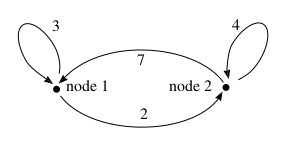

In [124]:
using IJulia
IJulia.display("image/png", read("graph.png"))

The dimension of the matrix `S` is $2 \times 2$ because two nodes. Arcs $i \rightarrow j$ are depicted by the elements of `S[j,i]`. The order is reversed in order to keep the matrix product `S . x` with `x` a column vector.

Note that the Julia `GraphPlot.jl` packages do not correctly display this kind of matrix and that `SimpleWeightedGraphs.jl` does not take a (max,+) matrix.

Arc $2 \rightarrow 1$ with the valeur MP(7):

In [125]:
S[1,2]

(max,+) 7

Eigenvalues:

In [126]:
r.eigenvalues

2-element (max,+) vector:
  4.5
  4.5


eigenvectors:

In [127]:
r.eigenvectors

2-element (max,+) vector:
  6.5
    4


Number of connected components found (only one will be returned):

In [128]:
r.components

1

The list of nodes from the saturation policy:

In [129]:
r.policy

2-element Vector{Int64}:
 2
 1

### Résolution d'équations linéaires Max-Plus $A \otimes x = b$

Soit $A \in \mathbb{R}_{\varepsilon}^{n \times n}$ une matrice Max-plus carrée et $b \in \mathbb{R}_{\varepsilon}^{n}$ un vecteur colonne. La solution de $A \otimes x = b$ est donnée par :
$$x = A^{-1} \otimes b$$

L'inverse de $A$ peut être donné par les fonctions Julia `inv` ou `^-1` et si la matrice n'est pas inversible alors une erreur Julia est levée :

In [130]:
A = [mp0 1 mp0; 2 mp0 mp0; mp0 mp0 3]

3×3 (max,+) dense matrix:
  .   1   .
  2   .   .
  .   .   3


In [131]:
inv(A)   # Ou bien A^-1

3×3 (max,+) dense matrix:
   .   -2    .
  -1    .    .
   .    .   -3


Vérifions que leur produit donne bien la matrice identité :

In [132]:
A * inv(A)   # Ou bien inv(A) * A

3×3 (max,+) dense matrix:
  0   .   .
  .   0   .
  .   .   0


Calculons $x = A^{-1} \otimes b$ :

In [133]:
B = [3 mp0 mp0; mp0 mp0 4; mp0 5 mp0]

3×3 (max,+) dense matrix:
  3   .   .
  .   .   4
  .   5   .


In [134]:
x = A \ B

3×3 (max,+) dense matrix:
  .   .   2
  2   .   .
  .   2   .


In [135]:
A * x == B

true

### Solving Max-Plus Linear Equations $x = Ax \oplus b$

Let $A \in \mathbb{R}_{\varepsilon}^{n \times n}$ a square Max-plus matrix and $b \in \mathbb{R}_{\varepsilon}^{n}$ a column vector. The solution of $x = Ax \oplus b$ is given by:
$$x = A^* b$$

Where:

$$A^+ \triangleq A^1 \oplus A^2 \oplus A^3 \oplus\;...$$
$$A^* \triangleq A^0 \oplus A^+$$

$A^0$ is none other than the Max-Plus identity matrix. $A^+$ is calculated by the function `plus` and $A^*$ is calculated by the function `star`. The solution of the equation is given by the function `astarb`. A solution exists as soon as the largest circuit in the adjacency graph of the matrix has a negative or null weight. The weight of a circuit being given by the sum of the weights of the arcs (coefficients of the matrix) constituting it.

In [136]:
star(MP(2))

(max,+) Inf

In [137]:
star(MP(-2))

(max,+) 0

In [138]:
A = MP([-3 -2; -1 0])
plus(A)

2×2 (max,+) dense matrix:
   0   -2
  -1    0


In [139]:
star(A)

2×2 (max,+) dense matrix:
   0   -2
  -1    0


In [140]:
plus(A) == A * star(A)

true

In [141]:
star(zeros(MP, 2,2)) == star(full(zeros(MP, 2,2)))

true

In [142]:
b = MP([mp0; mp1])

2-element (max,+) vector:
  .
  0


In [143]:
x = astarb(A, b)

2-element (max,+) vector:
  -2
   0


In [144]:
x == A * x + b

true